## Analysis Question 1
### Do CO2 emissions correlate with increased energy production?

### There is not a positive correlation. For the time frame measured which was limited to the United States, CO2 emissions were on a downward trend as energy output increased. Both datasets were found to be significant, but the research returned a slight negative correlation value. More research is needed as to what impact energy production has on CO2 emissions in the U.S., and the specifics of how.

- For every **One Trillion Megawatt Hours** of energy output, CO2 Emissions decreased by about **0.27 Megatons per Capita** in the dataset provided.
- The correlation coefficient between CO2 Emissions and Energy Production is **-0.2555**, suggesting a minimal correlation.
- The P-value for C02 Emissions was 0.0000952, far below the general 0.05 threshold, indicating that the null hypothesis can be rejected.
- The P-value for Energy Output was 0.00478, also well below the 0.05 threshold, showing the data is significant and that the null hypothesis can be rejected.

### Other Findings

- Energy output R value is **0.604** showing a strong upward trends at **0.0112 Trillion Megawatt Hours** per year.
- **2009** was a year of relatively low Emissions/Output for both datasets. Although it may be coincidental, it may also be an indicator of an event, policy or law in effect.

### Data Used

- **CO2 Emissions (2001-2020)** (world_emission_data.csv)
- **Energy Output (US) (2001-2020)** (us_total_energy_out.csv)

### Limitations of Data

- All data is limited to the United States.
- Energy Output does not necessarily mean Energy Production, the dataset does not clarify whether the data is a measurement of energy output or raw energy production, which means it may or may not be accounting for waste, loss, etc.
- Both Graphs use different Y-axis scales and limits for different units of measurement, which may skew the visual impression of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as ticker
from scipy import stats
from scipy.stats import linregress
import seaborn as sns

# Read the data from a CSV file
df_graph = pd.read_csv('Data/world_emission_data.csv', index_col=0)

df_graph = df_graph.transpose()

df_graph = df_graph["United States of America"]
df_graph = pd.DataFrame(df_graph)
df_graph = df_graph.reset_index()
df_graph['index'] = df_graph['index'].astype('int64')
df_graph['United States of America'] = df_graph['United States of America'].astype('int64')
df_graph['United States of America'] = (df_graph['United States of America'] / 10000000).round(2)
df_graph = df_graph[df_graph['index'] != 2000]
df_graph.head()

,index,United States of America
1,2001,1.57
2,2002,1.58
3,2003,1.59
4,2004,1.64
5,2005,1.64


In [2]:
df_graph_2 = pd.read_csv('Data/us_total_energy_out.csv', index_col=0)

df_graph_2 = df_graph_2[df_graph_2['Years'] != 2021]
df_graph_2['Energy Production (thousand megawatthours)'] = (df_graph_2['Energy Production (thousand megawatthours)'] / 1000000).round(2)
df_graph_2.head()

,Years,Energy Production (thousand megawatthours)
0,2001,3.74
1,2002,3.86
2,2003,3.88
3,2004,3.97
4,2005,4.06


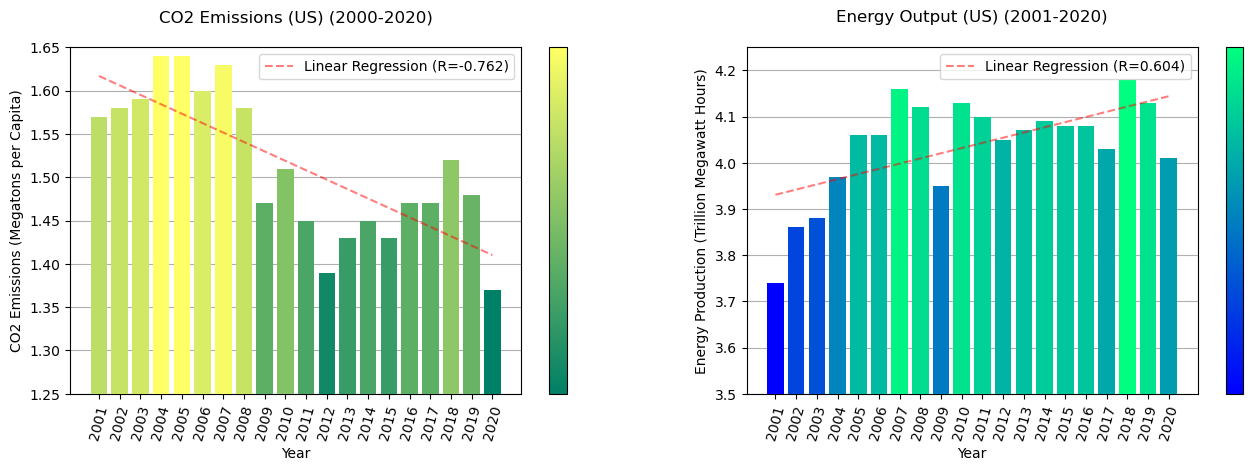

The P-value for CO2 is 9.522005805337396e-05
The P-value for Energy Output is 0.004783436369770513


In [3]:
# Create the bar chart
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4.5))

# Create Bar 1
colors1 = plt.cm.ScalarMappable(cmap='summer')

x1 = df_graph["index"]
y1 = df_graph["United States of America"]

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1, y1)
ax[0].plot(x1, slope1*x1 + intercept1, color='red', label=f'Linear Regression (R={r_value1:.3f})', linestyle="--", alpha=0.5, zorder=4)

# Create the bars with gradient color
bars = ax[0].bar(x1, y1, color=colors1.to_rgba(y1), zorder=3)

# Add a colorbar
cbar = plt.colorbar(colors1, ax=[ax[0]], location='right')
cbar.ax.set_yticklabels([])
cbar.ax.set_yticks([])

# Set the x-axis label and tick labels
ax[0].set_ylabel("CO2 Emissions (Megatons per Capita)")
ax[0].set_xlabel("Year")
ax[0].set_xticks(x1)
ax[0].set_xticklabels(x1, rotation=75)

# Set the plot title
ax[0].set_title("CO2 Emissions (US) (2000-2020)", y=1.05)

# Set minimum Y axis value
ax[0].grid(axis='y', zorder=0)
ax[0].set_ylim(bottom=1.25, top=1.65)
ax[0].legend()

# Create Bar 2
colors2 = plt.cm.ScalarMappable(cmap='winter')

x2 = df_graph_2["Years"]
y2 = df_graph_2["Energy Production (thousand megawatthours)"]

slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, y2)
ax[1].plot(x2, slope2*x1 + intercept2, color='red', label=f'Linear Regression (R={r_value2:.3f})', linestyle="--", alpha=0.5, zorder=4)

# Create the bars with gradient color
bars = ax[1].bar(x2, y2, color=colors2.to_rgba(y2), zorder=3)

# Add a colorbar
cbar = plt.colorbar(colors2, ax=[ax[1]], location='right')
cbar.ax.set_yticklabels([])
cbar.ax.set_yticks([])

# Set the x-axis label and tick labels
ax[1].set_ylabel("Energy Production (Trillion Megawatt Hours)")
ax[1].set_xlabel("Year")
ax[1].set_xticks(x2)
ax[1].set_xticklabels(x2, rotation=75)

# Set the plot title
ax[1].set_title("Energy Output (US) (2001-2020)", y=1.05)

# Set minimum Y axis value
ax[1].grid(axis='y', zorder=0)
ax[1].set_ylim(bottom=3.5, top=4.25)
ax[1].legend()
plt.savefig("Visual/Q1_Fig_1-CO2_and_Energy.png")

# Display the chart
plt.show()
print(f"The P-value for CO2 is {p_value1}")
print(f"The P-value for Energy Output is {p_value2}")

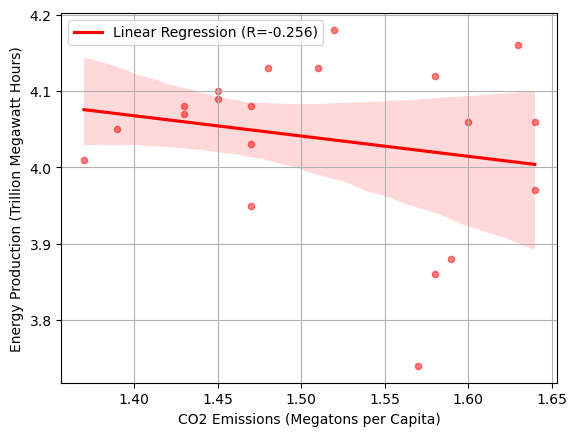

Correlation Coefficient (R) for CO2 vs Energy Production is -0.2555362707418393
For CO2 vs Energy Production, y = -0.27x + 4.44


In [4]:
fig, axs = plt.subplots()
corr = y1.corr(y2)
sns.regplot(x=y1, y=y2, color="red",
            scatter_kws={'s': 20, 'alpha': 0.5},
            line_kws={'label': f"Linear Regression (R={corr:.3f})"},
            ax=axs)
axs.set_xlabel('CO2 Emissions (Megatons per Capita)')
axs.set_ylabel('Energy Production (Trillion Megawatt Hours)')
axs.legend()
axs.grid()
plt.savefig("Visual/Q1_Fig_2-Linear_Regression_CO2_and_Energy.png")
plt.show()

slope, intercept, r_value, p_value, std_err = linregress(y1, y2)
print(f"Correlation Coefficient (R) for CO2 vs Energy Production is {corr}")
print(f"For CO2 vs Energy Production, y = {slope:.2f}x + {intercept:.2f}")